<a href="https://colab.research.google.com/github/bipinkumar005/Dog-vs-Cat-Classification-using-CNN/blob/main/Dog_vs_Cat_Classification(BatchNorm%2BDropout).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:14<00:00, 88.7MB/s]
100% 1.06G/1.06G [00:14<00:00, 79.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Generators
#  It reads images from the specified directory,
# resizes them to a uniform size, and batches them for training.
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

# Create CNN Model
# simple Model

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu' ))
model.add(Dense(64,activation='relu'))


model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)



Epoch 1/10
625/625 [==============================] - 37s 49ms/step - loss: 0.5827 - accuracy: 0.6783 - val_loss: 0.4734 - val_accuracy: 0.7698
Epoch 2/10
625/625 [==============================] - 30s 47ms/step - loss: 0.4523 - accuracy: 0.7853 - val_loss: 0.4384 - val_accuracy: 0.7934
Epoch 3/10
625/625 [==============================] - 30s 48ms/step - loss: 0.3673 - accuracy: 0.8367 - val_loss: 0.4200 - val_accuracy: 0.8182
Epoch 4/10
625/625 [==============================] - 35s 55ms/step - loss: 0.2671 - accuracy: 0.8848 - val_loss: 0.4390 - val_accuracy: 0.8214
Epoch 5/10
625/625 [==============================] - 29s 46ms/step - loss: 0.1682 - accuracy: 0.9325 - val_loss: 0.5895 - val_accuracy: 0.8096
Epoch 6/10
625/625 [==============================] - 29s 46ms/step - loss: 0.1045 - accuracy: 0.9603 - val_loss: 0.6872 - val_accuracy: 0.8062
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.0671 - accuracy: 0.9774 - val_loss: 0.7984 - val_accuracy:

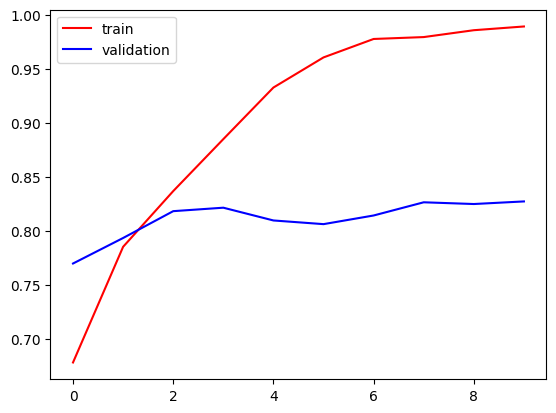

In [ ]:
# Without any Overfitting method
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

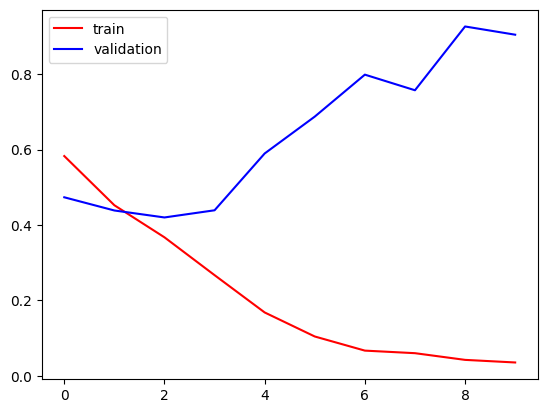

In [ ]:
# # without any Overfitting Method
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Now we apply Batch Normalization and Drop out to reduce Overfitting

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu' ))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history2=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 36s 51ms/step - loss: 0.8425 - accuracy: 0.6146 - val_loss: 0.5915 - val_accuracy: 0.6820
Epoch 2/10
625/625 [==============================] - 31s 48ms/step - loss: 0.5426 - accuracy: 0.7236 - val_loss: 0.5824 - val_accuracy: 0.7124
Epoch 3/10
625/625 [==============================] - 30s 48ms/step - loss: 0.4679 - accuracy: 0.7772 - val_loss: 0.4923 - val_accuracy: 0.7614
Epoch 4/10
625/625 [==============================] - 30s 47ms/step - loss: 0.3856 - accuracy: 0.8220 - val_loss: 0.4188 - val_accuracy: 0.8106
Epoch 5/10
625/625 [==============================] - 31s 48ms/step - loss: 0.3225 - accuracy: 0.8579 - val_loss: 0.4599 - val_accuracy: 0.8064
Epoch 6/10
625/625 [==============================] - 31s 48ms/step - loss: 0.2565 - accuracy: 0.8875 - val_loss: 0.4165 - val_accuracy: 0.8432
Epoch 7/10
625/625 [==============================] - 31s 49ms/step - loss: 0.1898 - accuracy: 0.9182 - val_loss: 0.4365 - val_accuracy:

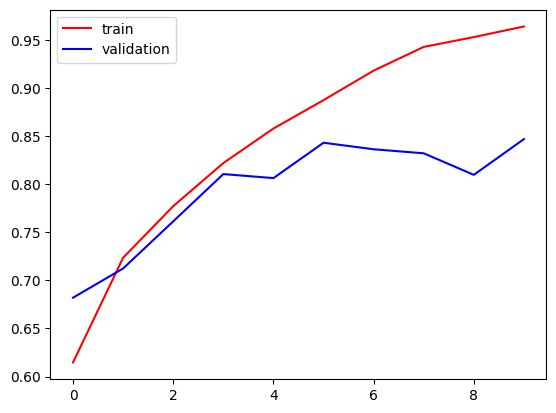

In [ ]:
# Without any Overfitting method
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

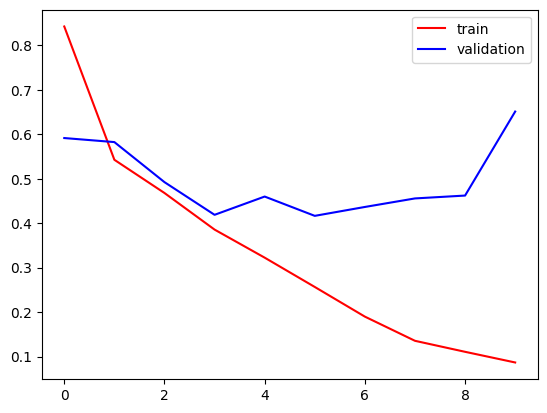

In [ ]:
# # without any Overfitting Method
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

1/1 [==============================] - 0s 18ms/step
It's a cat!


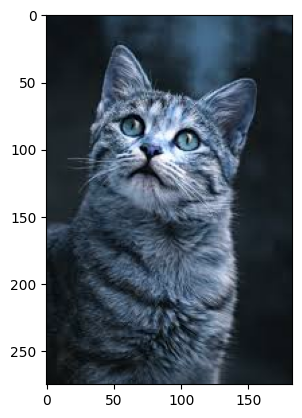

In [ ]:
test_img=cv2.imread('/content/pred/download (1).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 25ms/step
It's a dog!


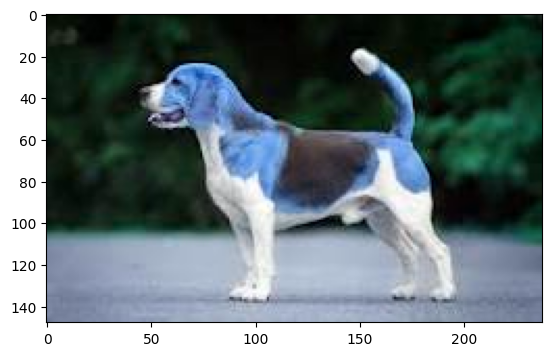

In [ ]:
test_img=cv2.imread('/content/pred/images (1).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 26ms/step
It's a cat!


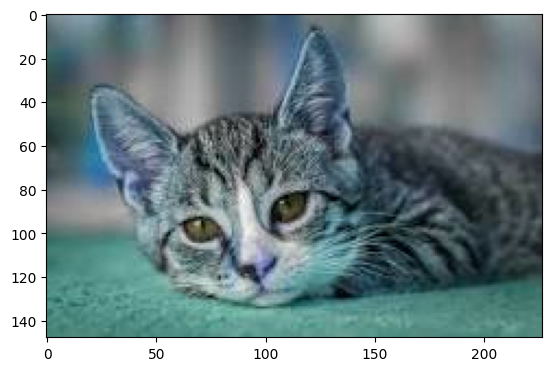

In [ ]:
test_img=cv2.imread('/content/pred/download.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 30ms/step
It's a dog!


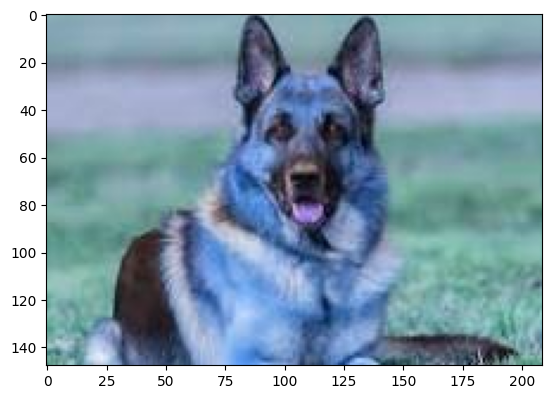

In [ ]:
test_img=cv2.imread('/content/pred/images (2).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 42ms/step
It's a dog!


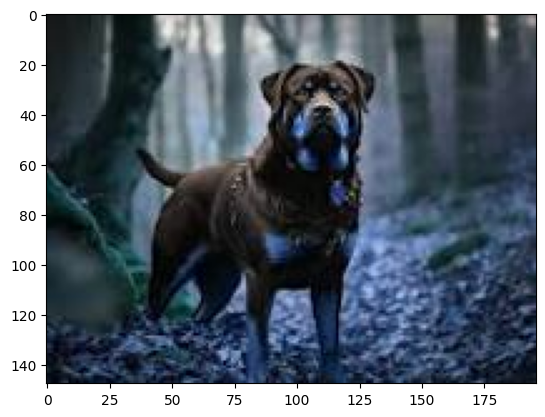

In [ ]:
test_img=cv2.imread('/content/pred/images (3).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 51ms/step
It's a cat!


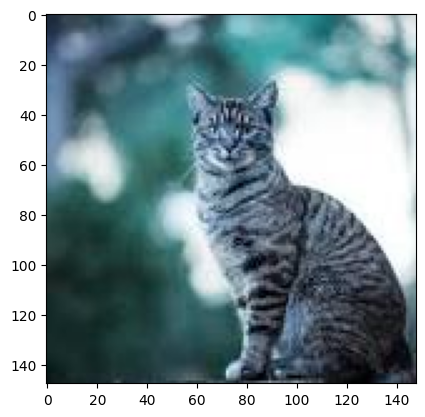

In [ ]:
test_img=cv2.imread('/content/pred/images (4).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

1/1 [==============================] - 0s 20ms/step
It's a dog!


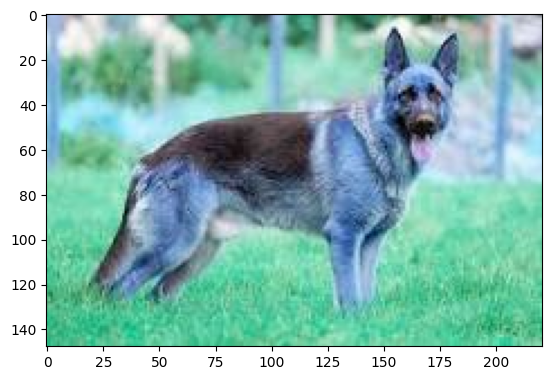

In [ ]:
test_img=cv2.imread('/content/pred/images.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
normalized_image = test_input / 255.0
prediction = model.predict(normalized_image)

# Interpret the prediction
if prediction < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")